In [50]:
import os
import pickle
import matplotlib.pyplot as plt
import keras
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Flatten, LeakyReLU
from keras.models import Model
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

ImportError: cannot import name 'MapWrapper'

In [3]:
CNN = load_model("../results/logs/ModelCheckpoint/best_model.h5")

In [8]:
def load_data(path="../Data/"):
    x_data = np.load(path + "X_train.npy")
    y_data = np.load(path + "Y_train_letters.npy")
    x_data = np.reshape(x_data, newshape=(-1, 32, 32, 1))

    x_data = np.divide(np.subtract(x_data, 127.5), 127.5)
    return x_data, y_data


def load_test_data(path="../Data/Test/"):
    x_test = np.array(pickle.load(open(path + "x_test.pkl", 'rb'), encoding='bytes'))
    prediction = np.array(pickle.load(open(path + "prediction.pkl", 'rb'), encoding='bytes'))
    le = LabelEncoder()
    prediction = le.fit_transform(prediction)
    prediction = to_categorical(prediction)
    x_test = np.reshape(x_test, newshape=(-1, 32, 32, 1))
    x_test = np.divide(np.subtract(x_test, 127.5), 127.5)
    return x_test, prediction


In [49]:
# x_data, y_data = load_data()
# x_test, y_test = load_test_data()

In [51]:
log_df = pd.read_csv("../results/logs/csv_log.csv")
log_df.columns
epochs = log_df["epoch"].values

train_acc = log_df["acc"].values
val_acc = log_df["val_acc"].values
train_loss = log_df["loss"].values
val_loss = log_df["val_loss"].values
n_epochs = int(np.max(epochs))

print(val_acc.max())

0.9629999923706056


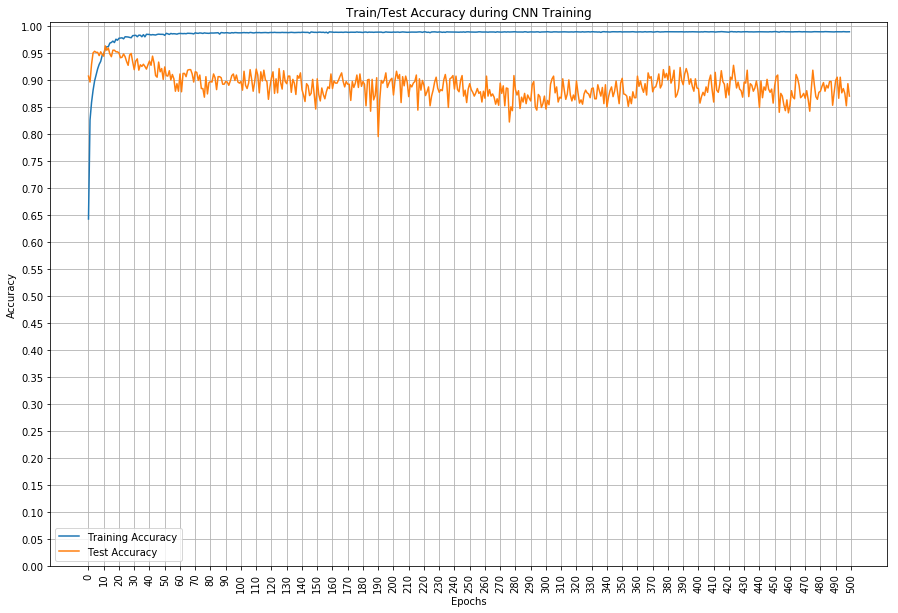

In [43]:
plt.figure(figsize=(15, 10))
plt.plot(epochs, train_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks([i for i in range(0, n_epochs + 5, 10)], rotation=90)
plt.yticks(np.arange(0.0, 1.05, .05).tolist())
plt.title("Train/Test Accuracy during CNN Training")
plt.grid()
plt.legend(loc="best")
plt.savefig("../results/figs/Train-Test-Acc.pdf")
plt.show()

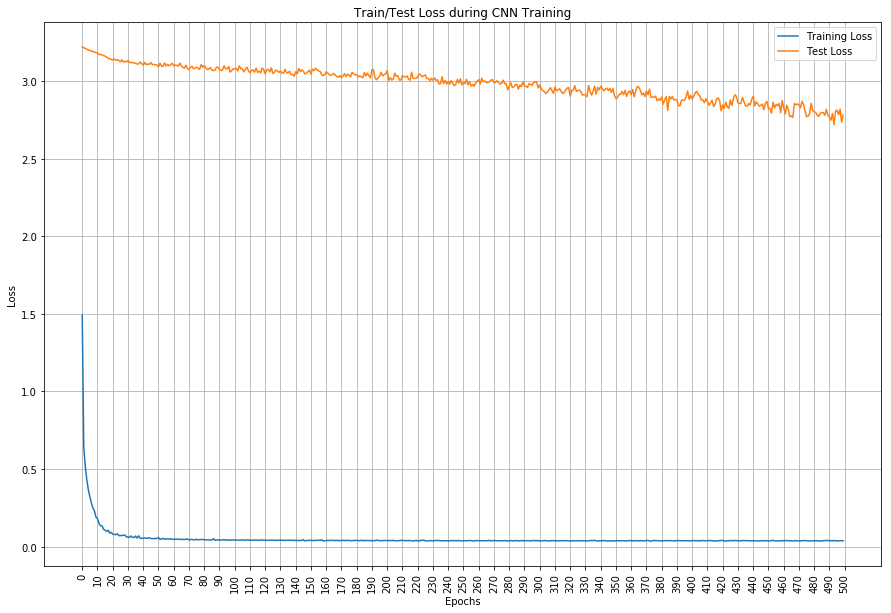

In [46]:
plt.figure(figsize=(15, 10))
plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks([i for i in range(0, n_epochs + 5, 10)], rotation=90)
# plt.yticks(np.arange(0.0, 1.05, .05).tolist())
plt.title("Train/Test Loss during CNN Training")
plt.grid()
plt.legend(loc="best")
plt.savefig("../results/figs/Train-Test-Loss.pdf")
plt.show()